In [1]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import geopandas as gpd

#set up psycopg2 environment
import psycopg2


#--> conda install contextily --channel conda-forge
import contextily as ctx
import geopy.distance
from shapely.geometry import LineString
from pyproj import Proj, transform
import dipy

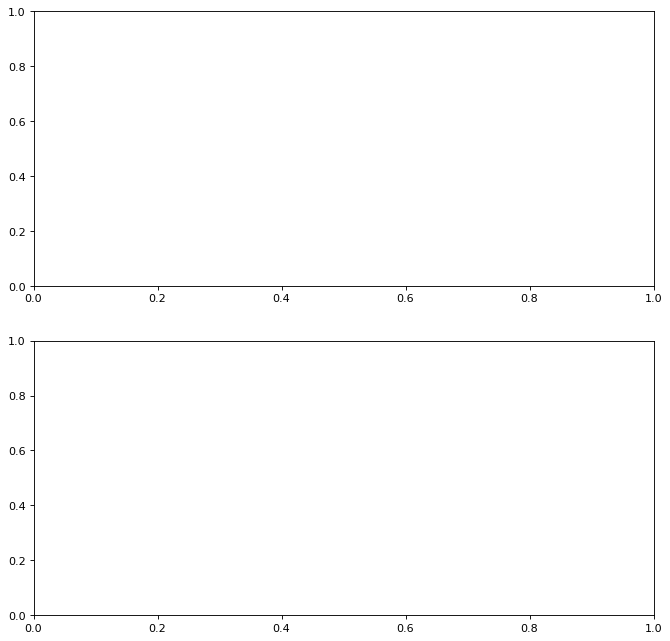

In [3]:









#------------------------------------------------------------------------------------
# Required by clustering class QuickBundles
#------------------------------------------------------------------------------------
import dipy 
from dipy.segment.metric import Metric
from dipy.segment.metric import ResampleFeature
from dipy.segment.clustering import QuickBundles
#------------------------------------------------------------------------------------
class GPSDistance(Metric):
    def __init__(self):
        super().__init__(feature=dipy.segment.metric.ResampleFeature(nb_points=256))
        #self._geod = Geod(ellps='WGS84')

    def are_compatible(self, shape_1, shape_2):
        return len(shape_1) == len(shape_2)
    def dist(self, v1, v2):
        distances = [geopy.distance.distance([p[0][0],p[0][1]],[p[1][0],p[1][1]]).km for p in list(zip(v1,v2))]
        return np.mean(distances)/1000.0
#------------------------------------------------------------------------------------


#------------------------------------------------------------------------------------
#   Base map (OpenStretMap) for visualisation
#------------------------------------------------------------------------------------
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/{z}/{x}/{y}.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    
#------------------------------------------------------------------------------------

#----------------------------------------------
# Step 0: Draw maps 
#----------------------------------------------
#plt.ion() #interactive... continue after plot
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#base = world.plot(color='white', edgecolor='black')
#ax=result.plot(ax=base)
fig = plt.figure(figsize=(10,10), dpi=80) # create the canvas for plotting
ax1 = plt.subplot(2,1,1) 
ax2 = plt.subplot(2,1,2, sharex = ax1, sharey = ax1)

In [5]:
coords_malaga = [-4.5123596191406250,36.7038574218750000 , -4.4552612304687500,36.7367858886718750]
#sql_command = """CREATE TABLE insiders AS SELECT idtrip, distance, tripline FROM simplified_trip WHERE ST_Within(ST_StartPoint(tripline),
#                ST_MakeEnvelope(-4.5123596191406250,36.7038574218750000 , -4.4552612304687500,36.7367858886718750, 4326)) AND ST_Within(ST_EndPoint(tripline),ST_MakeEnvelope(-4.5123596191406250,36.7038574218750000 , -4.4552612304687500,36.7367858886718750, 4326))"""

conn = psycopg2.connect("dbname = 'mlearn' user = 'ml_aa01' host = 'obd.ac.uma.es' password = 'vc0910$$'")#cur = conn.cursor()
sql= """WITH insiders AS (SELECT idtrip, distance, tripline FROM trip WHERE ST_Within(ST_StartPoint(tripline),
                ST_MakeEnvelope(-4.5123596191406250,36.7038574218750000 , -4.4552612304687500,36.7367858886718750)) AND ST_Within(ST_EndPoint(tripline),ST_MakeEnvelope(-4.5123596191406250,36.7038574218750000 , -4.4552612304687500,36.7367858886718750))) SELECT * FROM insiders"""
#cur.execute(sql_command)
#result = cur.fetchone()
#conn.commit()
#cur.close()
result = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='tripline', crs  ='epsg:4326' )#.to_crs(epsg=3857)
conn.close()


In [6]:
result

,idtrip,distance,tripline
0,846,1914.896984,"LINESTRING (-4.45627 36.71968, -4.45824 36.719..."
1,26,2886.675188,"LINESTRING (-4.49913 36.71892, -4.49912 36.719..."
2,368,1116.394754,"LINESTRING (-4.46595 36.71299, -4.46597 36.713..."
3,463,1091.358898,"LINESTRING (-4.47409 36.71511, -4.47361 36.714..."
4,462,1059.675458,"LINESTRING (-4.46883 36.71088, -4.46880 36.711..."
5,25,3292.728006,"LINESTRING (-4.49483 36.71593, -4.49477 36.715..."
6,574,1277.048328,"LINESTRING (-4.48979 36.71749, -4.48976 36.717..."
7,47,1720.715049,"LINESTRING (-4.48210 36.71810, -4.48213 36.718..."
8,944,872.195157,"LINESTRING (-4.47641 36.71151, -4.47637 36.713..."
9,465,1945.854929,"LINESTRING (-4.46335 36.70717, -4.46478 36.706..."


In [7]:
#----------------------------------------------
# Step 2: Store tracks in a custon array, before using QuickBundles
#----------------------------------------------
result2=result['tripline']
result3857=result2.to_crs(epsg=3857)

In [8]:
result3857.plot(ax=ax1)
url='http://tile.stamen.com/terrain/{z}/{x}/{y}.png'
ctx.add_basemap(ax1,source=url)
#add_basemap(ax1, zoom=15)
print(result2.head())
listarray = []
#from shapely.ops import linemerge
for track in result2:
    if track.geom_type == 'LineString':
        x,y = track.coords.xy
        listarray.append(np.transpose([x,y]))
    

0    LINESTRING (-4.45627 36.71968, -4.45824 36.719...
1    LINESTRING (-4.49913 36.71892, -4.49912 36.719...
2    LINESTRING (-4.46595 36.71299, -4.46597 36.713...
3    LINESTRING (-4.47409 36.71511, -4.47361 36.714...
4    LINESTRING (-4.46883 36.71088, -4.46880 36.711...
Name: tripline, dtype: geometry


<Figure size 432x288 with 0 Axes>

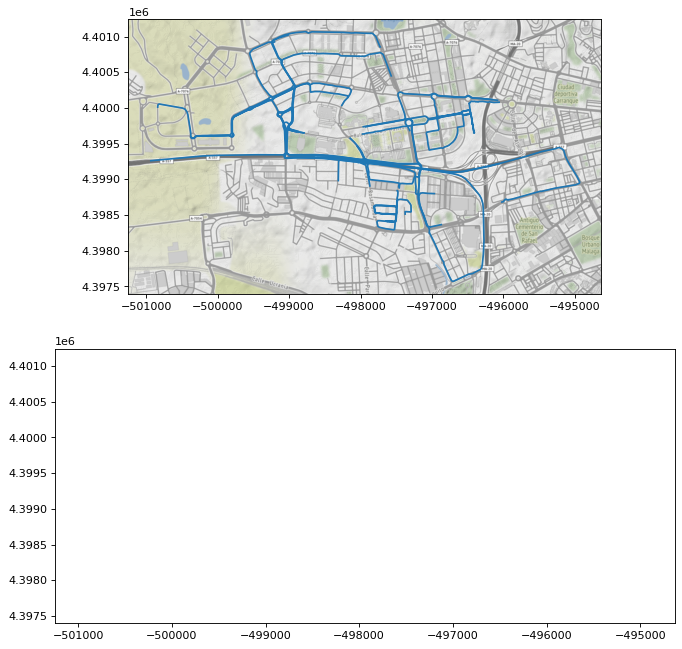

In [9]:
display(fig)

In [10]:
#----------------------------------------------
# Step 3: Execute QuickBundles
#----------------------------------------------

print('Iniciando algoritmo')
metric=GPSDistance()
qb=QuickBundles(threshold=0.0007,metric=metric)
clusters=qb.cluster(listarray)
print('Numero de clusters, ',len(clusters))

Iniciando algoritmo
Numero de clusters,  9


D:\proyectos\acc\acc\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
D:\proyectos\acc\acc\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ipe\AppData\Local\Temp/ipykernel_3236/3813974074.py:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x,y=transform(inPr

Tengo 4  clusters validos


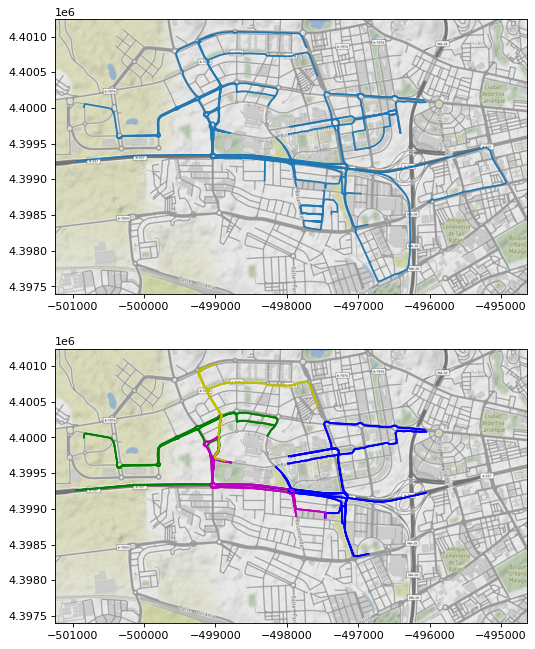

In [13]:
outProj = Proj(init='epsg:3857')
inProj = Proj(init='epsg:4326')
color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'p']
cnt=0
for i in range(0,len(clusters)):
    if len(clusters[i].indices) > 2:
        cnt=cnt+1
        for j in clusters[i].indices:
            lista=listarray[j]
            line =LineString(lista)
            x,y=transform(inProj,outProj,line.coords.xy[0],line.coords.xy[1])
            ax2.plot(x,y,color[i%8])
print("Tengo" ,cnt, " clusters validos")
#add_basemap(ax2, zoom=15)
ctx.add_basemap(ax2,source=url,zoom=15)
display(fig)
